In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#**2.1. The Box-Mueller method**

In [ ]:
U1 = np.random.uniform(0, 1, 10000)
U2 = np.random.uniform(0, 1, 10000)
Z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
Z2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)

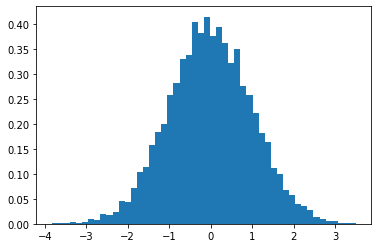

In [ ]:
n, bins, patches = plt.hist(Z1, 50, density=True)

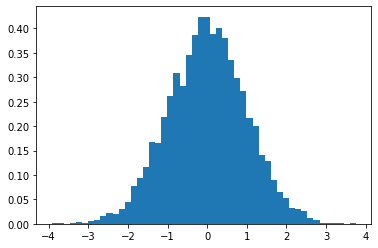

In [ ]:
n, bins, patches = plt.hist(Z2, 50, density=True)

They have the same histogram layout as the standard Gaussian distribution. Z1 presents a higher spread and Z2 presents a lower spread.

In [ ]:
E = np.cumsum(Z1*Z2)[-1] / 10000
E

0.00345031360801964

We see that the covariance is close to 0.

#**2.2. Simulating Brownian motion** 



In [ ]:
C1 = np.zeros((100,100))
for i in range(100):
  for j in range(100):
    C1[i][j] = (min(i,j)+1) / 100
C1

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.01, 0.02, 0.03, ..., 0.03, 0.03, 0.03],
       ...,
       [0.01, 0.02, 0.03, ..., 0.98, 0.98, 0.98],
       [0.01, 0.02, 0.03, ..., 0.98, 0.99, 0.99],
       [0.01, 0.02, 0.03, ..., 0.98, 0.99, 1.  ]])

In [ ]:
A1 = np.linalg.cholesky(C1)
A1

array([[0.1, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.1, 0.1, 0. , ..., 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, ..., 0. , 0. , 0. ],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0. , 0. ],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0. ],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]])

In [ ]:
def stand_gauss(N):
  return np.random.standard_normal((N, 100))

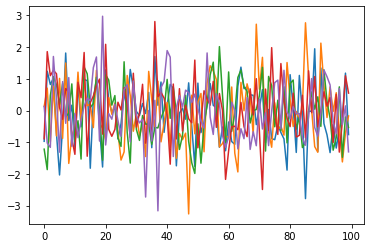

In [ ]:
X1 = stand_gauss(100)
for i in range(5):
  plt.plot(X1[i])

In [ ]:
B1 = np.dot(A1, X1)
Zero = np.zeros((1,100))
B1 = np.vstack([Zero, B1])
B1 = np.transpose(B1)

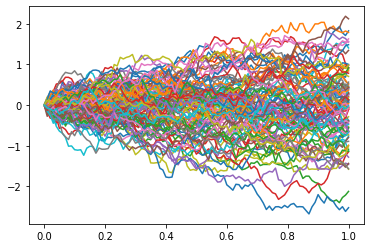

In [ ]:
x = np.linspace(0.0, 1.0, num=101)
for i in range(100):
  plt.plot(x, B1[i])

#**2.3. Simulating the Ornstein-Uhlenbeck process**


In [ ]:
C2 = np.zeros((100, 100))
for s in range(100):
  for t in range(100):
    s1 = (s+1)/100
    t1 = (t+1)/100
    if s<t :
      C2[s][t] = np.exp(-2 * (t1-s1)) * (1-np.exp(-2*s1)) * 0.5
    else:
      C2[s][t] = np.exp(-2 * (s1-t1)) * (1-np.exp(-2*t1)) * 0.5
C2

array([[0.00990066, 0.00970462, 0.00951245, ..., 0.00142276, 0.00139459,
        0.00136698],
       [0.00970462, 0.01960528, 0.01921707, ..., 0.00287427, 0.00281736,
        0.00276157],
       [0.00951245, 0.01921707, 0.02911773, ..., 0.0043551 , 0.00426886,
        0.00418433],
       ...,
       [0.00142276, 0.00287427, 0.0043551 , ..., 0.42957079, 0.42106472,
        0.41272708],
       [0.00139459, 0.00281736, 0.00426886, ..., 0.42106472, 0.43096538,
        0.4224317 ],
       [0.00136698, 0.00276157, 0.00418433, ..., 0.41272708, 0.4224317 ,
        0.43233236]])

In [ ]:
A2 = np.linalg.cholesky(C2)
A2

array([[0.09950208, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0975318 , 0.10046307, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09560054, 0.09847376, 0.10139619, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01429884, 0.01472858, 0.01516569, ..., 0.13494698, 0.        ,
        0.        ],
       [0.01401571, 0.01443694, 0.01486539, ..., 0.13227486, 0.13504926,
        0.        ],
       [0.01373818, 0.01415107, 0.01457103, ..., 0.12965564, 0.13237511,
        0.13514944]])

In [ ]:
X2 = stand_gauss(100)
B2 = np.dot(A2, X2)
Zero = np.zeros((1,100))
B2 = np.vstack([Zero, B2])
B2 = np.transpose(B2)

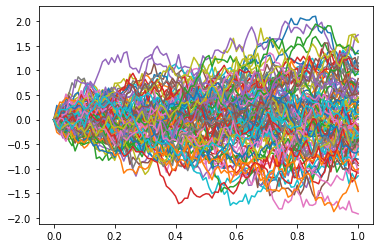

In [ ]:
x = np.linspace(0.0, 1.0, num=101)
for i in range(100):
  plt.plot(x, B2[i])

**Stationnary**

In [ ]:
C3 = np.zeros((100, 100))
for s in range(100):
  for t in range(100):
    s1 = (s+1)/100
    t1 = (t+1)/100
    if s<t :
      C3[s][t] = np.exp(-2 * (t1-s1)) * 0.5
    else:
      C3[s][t] = np.exp(-2 * (s1-t1)) * 0.5
C3

array([[0.5       , 0.49009934, 0.48039472, ..., 0.07185197, 0.07042921,
        0.06903462],
       [0.49009934, 0.5       , 0.49009934, ..., 0.07330348, 0.07185197,
        0.07042921],
       [0.48039472, 0.49009934, 0.5       , ..., 0.07478431, 0.07330348,
        0.07185197],
       ...,
       [0.07185197, 0.07330348, 0.07478431, ..., 0.5       , 0.49009934,
        0.48039472],
       [0.07042921, 0.07185197, 0.07330348, ..., 0.49009934, 0.5       ,
        0.49009934],
       [0.06903462, 0.07042921, 0.07185197, ..., 0.48039472, 0.49009934,
        0.5       ]])

In [ ]:
A3 = np.linalg.cholesky(C3)
A3

array([[0.70710678, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.69310513, 0.14001886, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.67938073, 0.1372463 , 0.14001886, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10161404, 0.02052774, 0.02094243, ..., 0.14001886, 0.        ,
        0.        ],
       [0.09960194, 0.02012126, 0.02052774, ..., 0.1372463 , 0.14001886,
        0.        ],
       [0.09762969, 0.01972284, 0.02012126, ..., 0.13452864, 0.1372463 ,
        0.14001886]])

In [ ]:
X3 = stand_gauss(100)
B3 = np.dot(A3, X3)
B3 = np.transpose(B3)

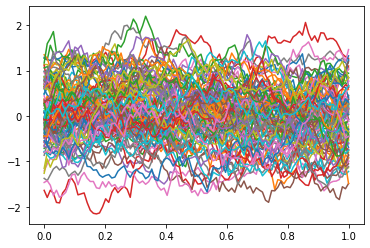

In [ ]:
x = np.linspace(0.0, 1.0, num=100)
for i in range(100):
  plt.plot(x, B3[i])

#**2.4. Simulating fractional Brownian motion**

In [ ]:
def frac_brownian(H):
  C = np.zeros((100,100))
  for s in range(100):
    for t in range(100):
      s1 = (s+1)/100
      t1 = (t+1)/100
      C[s][t] = 0.5 * (t1**(2*H) + s1**(2*H) - np.abs(t1-s1)**(2*H))
  return C

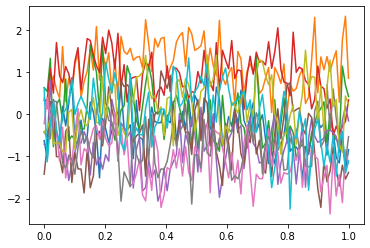

In [ ]:
C4 = frac_brownian(0.1)
A4 = np.linalg.cholesky(C4)
X4 = stand_gauss(100)
B4 = np.dot(A4, X4)
B4 = np.transpose(B4)
x = np.linspace(0.0, 1.0, num=100)
for i in range(10): #Let's see only 10 paths for a better view
  plt.plot(x, B4[i])

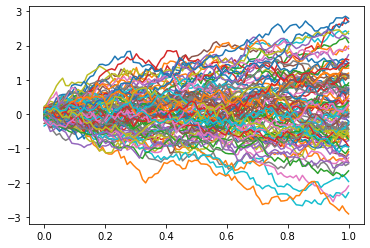

In [ ]:
C5 = frac_brownian(0.5)
A5 = np.linalg.cholesky(C5)
X5 = stand_gauss(100)
B5 = np.dot(A5, X5)
B5 = np.transpose(B5)
x = np.linspace(0.0, 1.0, num=100)
for i in range(100):
  plt.plot(x, B5[i])

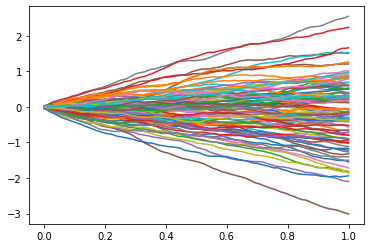

In [ ]:
C6 = frac_brownian(0.9)
A6 = np.linalg.cholesky(C6)
X6 = stand_gauss(100)
B6 = np.dot(A6, X6)
B6 = np.transpose(B6)
x = np.linspace(0.0, 1.0, num=100)
for i in range(100):
  plt.plot(x, B6[i])

#**2.5. Simulating the Brownian bridge**

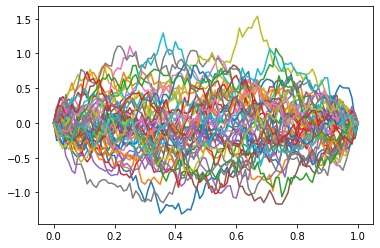

In [ ]:
C7 = np.zeros((99, 99))
for s in range(99):
  for t in range(99):
    s1 = (s+1)/100
    t1 = (t+1)/100
    if s<=t :
      C7[s][t] = s1 * (1-t1)
    else:
      C7[s][t] = t1 * (1-s1)
A7 = np.linalg.cholesky(C7)
np.random.seed(0)
X7 = stand_gauss(100)
X7 = X7[:99]
B7 = np.dot(A7, X7)
Zero = np.zeros((1,100))
B7 = np.vstack([Zero, B7, Zero])
B7 = np.transpose(B7)
x = np.linspace(0.0, 1.0, num=101)
for i in range(50):
  plt.plot(x, B7[i])

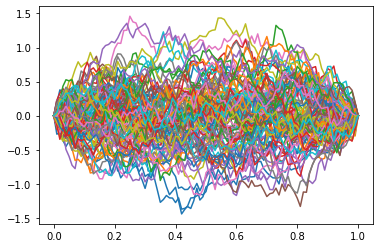

In [ ]:
C8 = np.zeros((100,100))
for i in range(100):
  for j in range(100):
    C8[i][j] = (min(i,j)+1) / 100
A8 = np.linalg.cholesky(C8)
np.random.seed(0)
X8 = stand_gauss(100)
B8 = np.dot(A8, X8)
Zero = np.zeros((1,100))
B8 = np.vstack([Zero, B8])
B8 = np.transpose(B8)
Z8 = B8
for i in range (100):
  for j in range(101):
    Z8[i][j] = B8[i][j] - j/100 * B8[i][-1]
x = np.linspace(0.0, 1.0, num=101)
for i in range(100):
  plt.plot(x, Z8[i])

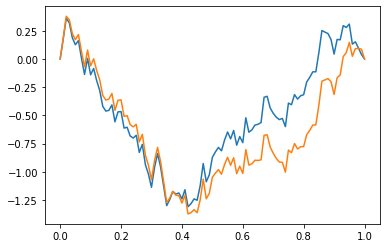

In [ ]:
plt.plot(x, B7[0])
plt.plot(x, Z8[0])

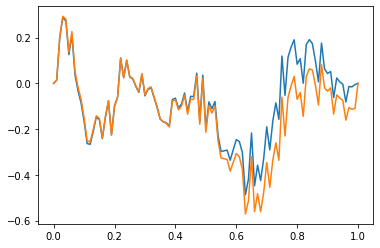

In [ ]:
plt.plot(x, B7[10])
plt.plot(x, Z8[10])

They have the same trajectory and follow each others. So they have not only equal distributions, but also they are the same process.